In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
SEQUENTIAL_DATA_PATH = "1_sequential/cross_fold_learning_curve.csv"
HIGHEST_UNCERTAINTY_DATA_PATH = "2_highest_uncertainty/cross_fold_learning_curve.csv"
HIGHEST_UNCERTAINTY_FPS_DATA_PATH = "3_highest_uncertainty_FPS/cross_fold_learning_curve.csv"

In [3]:
SMALL_SIZE = 12.5
MEDIUM_SIZE = 18
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [4]:
def plot_multiple_learning_curves_with_markers(csv_files, fig, ax, metric="mae", shaded=True, **kwargs):
    
    x_column = "num_datapoints"
    if metric == "mae":
        y_column = "mae_ave"
        error_column = "mae_std"
    elif metric == "rmse":
        y_column = "rmse_ave"
        error_column = "rmse_std"
        
    cutoff = kwargs.get("cutoff", 300)
    
    colors = sns.color_palette("colorblind", 3) 
    ax.set_prop_cycle('color', colors)
    #ax.set_prop_cycle('color', ['red', 'purple', 'green' ])
    
    labels = ["sequential", "highest uncertainty", "highest uncertainty FPS"]
    markers = ['o', 's', '^']

    for i, csv in enumerate(csv_files):
        df = pd.read_csv(csv)
    
        df = df[df["num_datapoints"] <= cutoff]

        x = np.array(df[x_column])
        y = np.array(df[y_column])
        yerrs = np.array(df[error_column])
        
        ax.plot(
            x,
            y,
            label=labels[i],
            marker=markers[i],
        )
        
        
        if shaded:
            ax.fill_between(
                x, 
                y-yerrs, 
                y+yerrs,
                alpha=0.4,
            )
        else:
            ax.errorbar(
                df[x_column], 
                df[y_column], 
                yerr=df[error_column],
            )
        

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


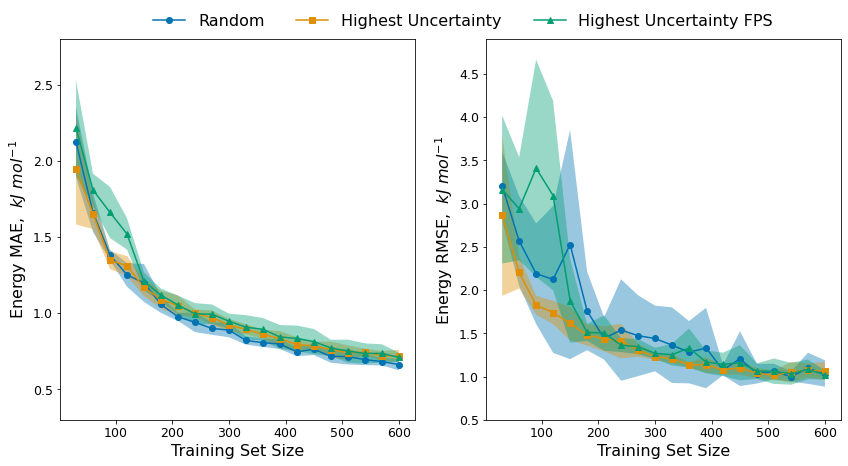

In [5]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(14, 7),
)
fig.set_facecolor('white')

csv_files = [SEQUENTIAL_DATA_PATH, HIGHEST_UNCERTAINTY_DATA_PATH, HIGHEST_UNCERTAINTY_FPS_DATA_PATH]

ax1.set_ylim(ymin=0.3, ymax=2.8)
ax1.set_ylabel("Energy MAE,  $kJ\ mol^{-1}$", fontsize=16)
ax1.set_xlabel("Training Set Size", fontsize=16)
plot_multiple_learning_curves_with_markers(csv_files, fig, ax1, shaded=True, ylims=(0.0,2.5), cutoff=600)

ax2.set_ylim(ymin=0.5, ymax=4.9)
ax2.set_ylabel("Energy RMSE,  $kJ\ mol^{-1}$", fontsize=16)
ax2.set_xlabel("Training Set Size", fontsize=16)
plot_multiple_learning_curves_with_markers(csv_files, fig, ax2, metric="rmse", shaded=True, ylims=(0.0,2.5), cutoff=600)


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
order = [0,1,2,3,4,5,7,6]
fig.legend(
    handles1, #[handles[idx] for idx in order],
    ["Random", "Highest Uncertainty", "Highest Uncertainty FPS"],#labels1, #[labels[idx] for idx in order],
    loc='upper center', 
    bbox_to_anchor=(0.525, 0.96),  
    ncol=3,
    fancybox=True,
    #shadow=True,
    frameon=False,
)

In [6]:
# fig.savefig(
#     "learning_curves_combined_both_markers.png",
#     bbox_inches="tight",
#     #transparent=True,
#     dpi=400,
# )